In [11]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../src/")
import utils as ut
import integration as itg
import mittag_leffler as ml
from fLe_twobath import fle_twobath
import plot_utils as pu

plt.style.use("plot_style.mplstyle")

data_path = "../_raw/two_baths/"

In [12]:
# Next-guess algorithm
def inspect_nga(H, N, id):
    return ut.read_hdf5_data(f"{data_path}two_baths-h-{H}-{N}-{id}.hdf5")

In [13]:
# Finite differences
def inspect_fd(H, N, T, id):
    path_H = (f"{data_path}fBM-h-{H}-{N}-{id}.hdf5")
    path_12 = (f"{data_path}fBM-h-0.5-{N}-{id}.hdf5")
    noise_path = (f"{data_path}two_baths-h-{H}-noise{N}-{id}.hdf5")
    
    BH = ut.read_hdf5_data(path_H)
    B12 = ut.read_hdf5_data(path_12)
    B = np.array(BH.deets_v) + np.array(B12.deets_v)
    
    dBH = ut.read_hdf5_data(noise_path)
    
    t = dBH.deets_t
    
    delta_t = T/N
    
    eq = fle_twobath(H)
    eq.params(T, h = delta_t, v0 = 0)
    eq.external_B(B, t)
    eq.solve()
    eq.get_analytical(relaxation_type = 1)
    
    return eq

In [45]:
def plot_comparison(H, N, T, id, ax, panel, color_a, color_ng, color_fd, xlabel = False, ylabel = False, legend = False):
    nga = inspect_nga(H, N, id)
    eq = inspect_fd(H, N, T, id)
    
    order = 2-2*H
    rorder = round(order, 1)
    if order < 0.1:
        rorder = round(order, 2)
        
    ax.plot(eq.t, eq.analytical, ls = "-", label = r"$\alpha$ ="+str(rorder), color = color_a)
    if legend:
        ax.plot(nga.deets_t, nga.deets_v, ls = "--", color = color_ng, label = "Next-guess algorithm")
        ax.plot(eq.t, eq.numerical, ls = ":", color = "black", label = "Finite differences")
    else:
        ax.plot(nga.deets_t, nga.deets_v, ls = "--", color = color_ng)
        ax.plot(eq.t, eq.numerical, ls = ":", color = "black")
                
    if ylabel:
        ax.set_ylabel(r"$x(t)$")
    if xlabel:
        ax.set_xlabel(r"$t$")
    pu.add_caption_letter(ax, panel)
    ax.legend()

In [46]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

0.8
0.9
0.99


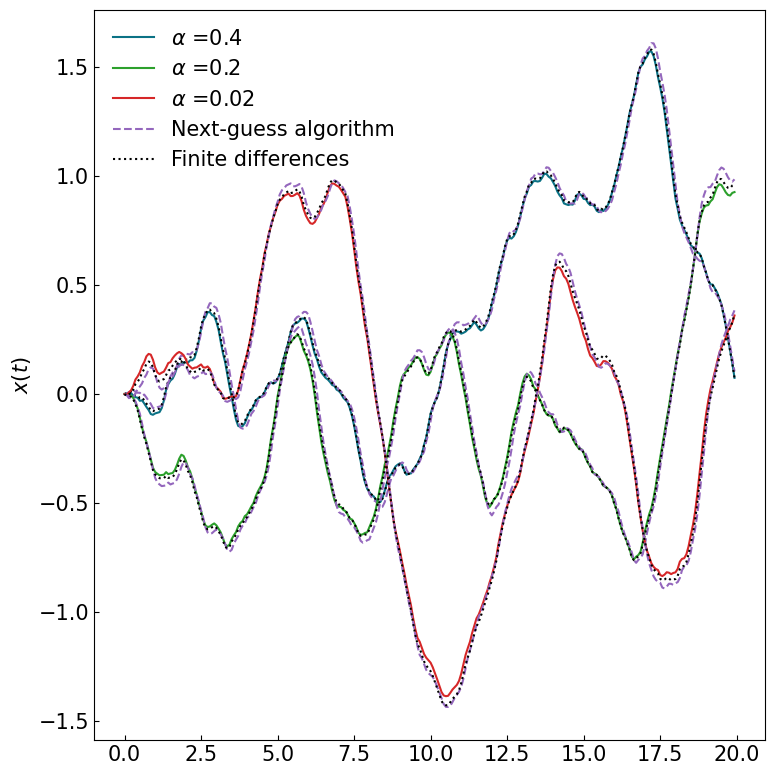

In [47]:
T = 20
fig, ax = plt.subplots(1,1, figsize=(8,8), sharex = True)

axi = ax

H = 0.8
N = 280
T = 20
id = 4
print(H)
plot_comparison(H, N, T, id, axi, 
                color_a = colors[7],
                color_fd = colors[0],
                color_ng = colors[1],
                panel = "", ylabel = True)

H = 0.9
N = 280
T = 20
id = 5
print(H)
plot_comparison(H, N, T, id, axi, 
                color_a = colors[8],
                color_fd = colors[0],
                color_ng = colors[1],
                panel = "", ylabel = True)

H = 0.99
N = 280
T = 20
id = 6
print(H)
plot_comparison(H, N, T, id, axi, 
                color_a = colors[9],
                color_fd = colors[0],
                color_ng = colors[1],
                panel = "", ylabel = True,
                legend = True)

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.07), ncol = 3)

In [41]:
fig.savefig("../outs/example_solutions.png", dpi = 200)
fig.savefig("../outs/example_solutions_500dpi.png", dpi = 500)
fig.savefig("../outs/example_solutions_1000dpi.png", dpi = 1000)